# Load data and needed libraries. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.impute import KNNImputer
import json
from sklearn.preprocessing import MinMaxScaler
import pickle

* Load data from `car_data.csv` file

* Take copy from data to safe origin data

In [3]:
df = pd.read_csv('../car_data.csv')

df_copy = df.copy()

# Data Understanding

In [4]:
df_copy.head()

,الأسم,الموديل,السعر,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,طرف ثالث,التكميلي (جسم المركبة),المجموع,الدفع
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\r\nإغلاق مركزي\r\nجهاز إنذار\r\nمسجل CD...,1340.0,1751.0,3090.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\r\nإغلاق مركزي\r\nجهاز إنذار\r\nمسجل CD...,1690.0,1050.0,2740.0,NaN
4,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,مُكيّف\r\nإغلاق مركزي\r\nجهاز إنذار\r\nمسجل CD...,1340.0,1000.0,2340.0,NaN


* Display `Categroical` features using `O` letter. 

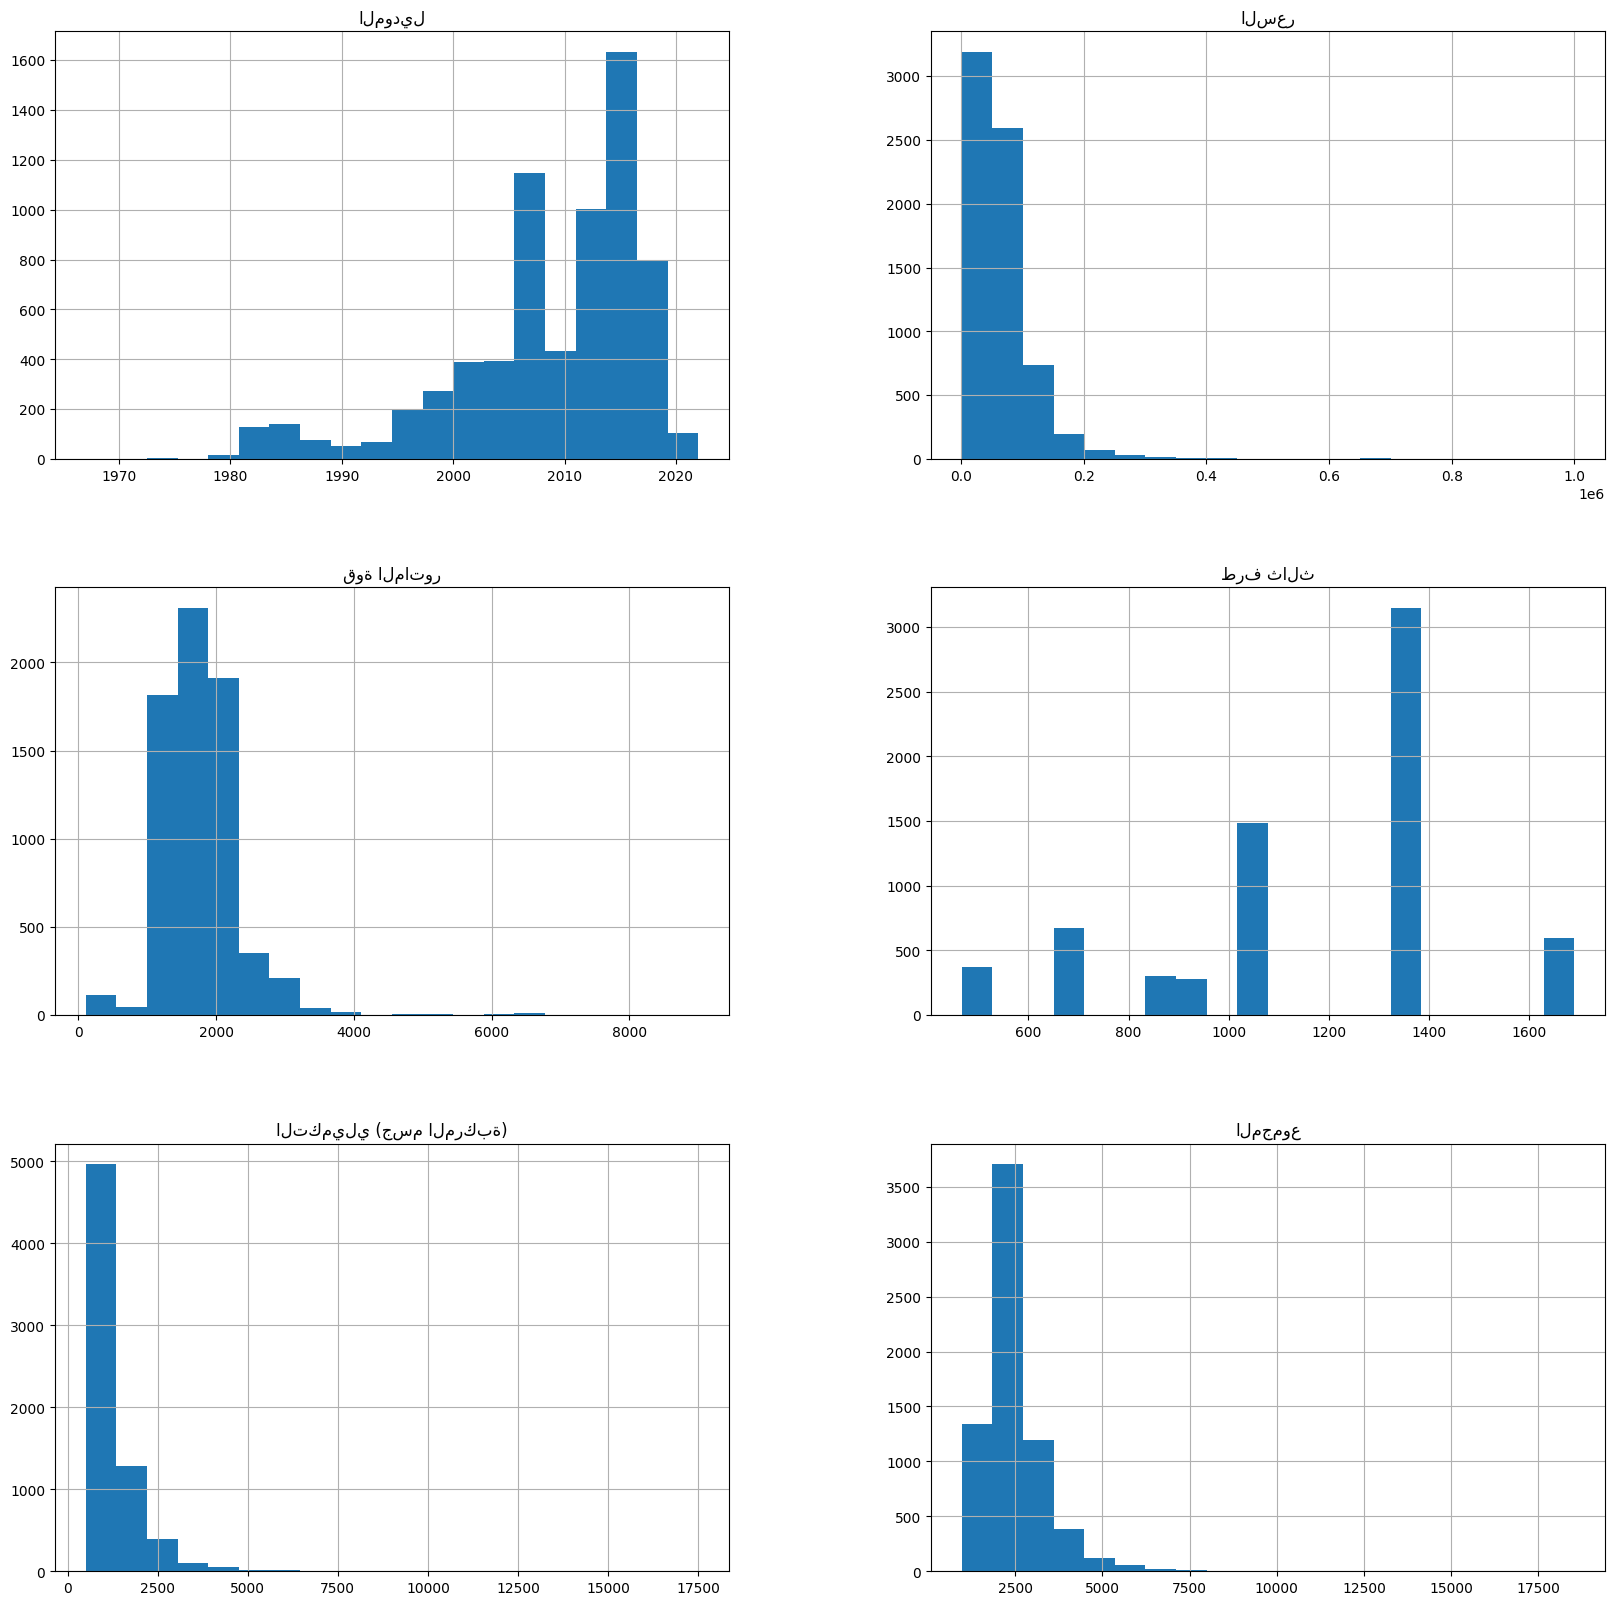

In [5]:
df_copy.hist(bins=20,figsize=(20,20))
plt.show()

In [6]:
print(df_copy.shape)

df_copy.describe(include='O')

(7777, 20)


,الأسم,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,الدفع
count,6864,6864,6864,6864,6864,6864,6864,4923,6087,6864,6864,5214,6363,1431
unique,619,26,4,6,2,3,2,1224,41,2,3,308,195,3
top,سكودا اوكتافيا,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,100000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\r\nإغلاق مركزي\r\nجهاز إنذار\r\nمسجل CD...,دفع أمامي
freq,499,1446,3970,5833,6789,3623,6338,107,4855,4323,4209,596,1254,1045


* Display `Numeric` features

In [7]:
df_copy.describe()

,الموديل,السعر,قوة الماتور,طرف ثالث,التكميلي (جسم المركبة),المجموع
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,2008.616259,66933.643211,1740.494755,1154.815705,1272.353730,2427.027972
std,8.690874,57022.973482,589.470714,310.412679,908.570233,1086.714895
min,1967.000000,1111.000000,106.000000,467.000000,500.000000,967.000000
25%,2005.000000,36000.000000,1400.000000,1035.000000,1000.000000,2035.000000
50%,2011.000000,55000.000000,1600.000000,1340.000000,1000.000000,2340.000000
75%,2015.000000,83000.000000,2000.000000,1340.000000,1436.000000,2768.000000
max,2022.000000,999999.000000,9000.000000,1690.000000,17500.000000,18535.000000


* Information about car data

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   الأسم                   6864 non-null   object 
 1   الموديل                 6864 non-null   float64
 2   السعر                   6864 non-null   float64
 3   لون السيارة             6864 non-null   object 
 4   نوع الوقود              6864 non-null   object 
 5   أصل السيارة             6864 non-null   object 
 6   رخصة السيارة            6864 non-null   object 
 7   نوع الجير               6864 non-null   object 
 8   الزجاج                  6864 non-null   object 
 9   قوة الماتور             6864 non-null   float64
 10  عداد السيارة            4923 non-null   object 
 11  عدد الركاب              6087 non-null   object 
 12  وسيلة الدفع             6864 non-null   object 
 13  معروضة                  6864 non-null   object 
 14  أصحاب سابقون            5214 non-null   

* Change Name of columns from Arabic to English to facilitate data handling

In [9]:
column_mapping = {
    'الأسم': 'Name',
    'الموديل': 'Model',
    'السعر': 'Price',
    'لون السيارة': 'Car Color',
    'نوع الوقود': 'Fuel Type',
    'أصل السيارة': 'Vehicle Origin',
    'رخصة السيارة': 'Car License',
    'نوع الجير': 'Transmission Type',
    'الزجاج': 'Glass',
    'قوة الماتور': 'Engine Power',
    'عداد السيارة': 'Car Mileage',
    'عدد الركاب': 'Passenger Count',
    'وسيلة الدفع': 'Payment Method',
    'معروضة': 'Offered',
    'أصحاب سابقون': 'Previous Owners',
    'إضافات': 'Additions',
    'طرف ثالث': 'Third Party',
    'التكميلي (جسم المركبة)': 'Supplementary (Vehicle Body)',
    'المجموع': 'Total',
    'الدفع': 'Drivetrain'
}

df_copy.rename(columns=column_mapping, inplace=True)

In [10]:
df_copy.columns

Index(['Name', 'Model', 'Price', 'Car Color', 'Fuel Type', 'Vehicle Origin',
       'Car License', 'Transmission Type', 'Glass', 'Engine Power',
       'Car Mileage', 'Passenger Count', 'Payment Method', 'Offered',
       'Previous Owners', 'Additions', 'Third Party',
       'Supplementary (Vehicle Body)', 'Total', 'Drivetrain'],
      dtype='object')

Display the data before the `cleaning process`, to see it before and after.

In [11]:
df.describe()

,الموديل,السعر,قوة الماتور,طرف ثالث,التكميلي (جسم المركبة),المجموع
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,2008.616259,66933.643211,1740.494755,1154.815705,1272.353730,2427.027972
std,8.690874,57022.973482,589.470714,310.412679,908.570233,1086.714895
min,1967.000000,1111.000000,106.000000,467.000000,500.000000,967.000000
25%,2005.000000,36000.000000,1400.000000,1035.000000,1000.000000,2035.000000
50%,2011.000000,55000.000000,1600.000000,1340.000000,1000.000000,2340.000000
75%,2015.000000,83000.000000,2000.000000,1340.000000,1436.000000,2768.000000
max,2022.000000,999999.000000,9000.000000,1690.000000,17500.000000,18535.000000


In [12]:
def calculate_missing_percentage(df):
    """
    Calculate the missing percentage for each column in the dataframe.

    Parameters:
    - df (pd.DataFrame): Input dataframe.

    Returns:
    - pd.Series: Series containing missing percentage for each column.
    """
    missing_percentage = (df.isnull().sum() / df.shape[0] * 100).map('{:.2f}%'.format)
    return missing_percentage

In [13]:
calculate_missing_percentage(df_copy)

Name                            11.74%
Model                           11.74%
Price                           11.74%
Car Color                       11.74%
Fuel Type                       11.74%
Vehicle Origin                  11.74%
Car License                     11.74%
Transmission Type               11.74%
Glass                           11.74%
Engine Power                    11.74%
Car Mileage                     36.70%
Passenger Count                 21.73%
Payment Method                  11.74%
Offered                         11.74%
Previous Owners                 32.96%
Additions                       18.18%
Third Party                     11.74%
Supplementary (Vehicle Body)    11.74%
Total                           11.74%
Drivetrain                      81.60%
dtype: object

In [14]:
df_copy.dtypes

Name                             object
Model                           float64
Price                           float64
Car Color                        object
Fuel Type                        object
Vehicle Origin                   object
Car License                      object
Transmission Type                object
Glass                            object
Engine Power                    float64
Car Mileage                      object
Passenger Count                  object
Payment Method                   object
Offered                          object
Previous Owners                  object
Additions                        object
Third Party                     float64
Supplementary (Vehicle Body)    float64
Total                           float64
Drivetrain                       object
dtype: object

# Drop useless columns

- `Drop` rows with all NaN values Because it will not affect the analysis process

In [15]:
df_copy.dropna(axis=0, how='all', inplace=True)

Display missing percentage after remove nan rows

In [16]:
calculate_missing_percentage(df_copy)

Name                             0.00%
Model                            0.00%
Price                            0.00%
Car Color                        0.00%
Fuel Type                        0.00%
Vehicle Origin                   0.00%
Car License                      0.00%
Transmission Type                0.00%
Glass                            0.00%
Engine Power                     0.00%
Car Mileage                     28.28%
Passenger Count                 11.32%
Payment Method                   0.00%
Offered                          0.00%
Previous Owners                 24.04%
Additions                        7.30%
Third Party                      0.00%
Supplementary (Vehicle Body)     0.00%
Total                            0.00%
Drivetrain                      79.15%
dtype: object

- Drop `Drivetrain` column, because the value of missing value rather that `70%`.

In [17]:
df_copy = df_copy.drop(columns='Drivetrain')

* Drop `insurance columns`, becasue it's will not affect price of car.

In [18]:
df_copy = df_copy.drop(columns=['Third Party', 'Supplementary (Vehicle Body)','Total'],axis=1)

In [19]:
df_copy.head(1)

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Additions
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\r\nإغلاق مركزي\r\nجهاز إنذار\r\nمسجل CD...


 - Fill missing value `' '` because there is `NaN` values, and when I want to change values to 1 or 0 get an error.
 
 - Use `lambda` function to check if `"فتحة سقف"` inside or not.

In [20]:
df_copy['Additions'] = df_copy['Additions'].fillna('')

df_copy['Sunroof'] = df_copy['Additions'].apply(lambda x: 1 if 'فتحة سقف' in x else 0)

- Drop `Additions` column.

In [21]:
df_copy = df_copy.drop('Additions',axis=1)
df_copy.head()

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Sunroof
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,1
3,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,1
4,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,0
6,فيات 127,1982.0,5500.0,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,0
7,بيجو 208,2014.0,54000.0,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,0


In [22]:
# df_copy.hist(bins=20,figsize=(20,20))
# plt.show()

- Drop `Offered` column.

In [23]:
df_copy = df_copy.drop(columns=['Offered'],axis=1)

In [24]:
calculate_missing_percentage(df_copy)

Name                  0.00%
Model                 0.00%
Price                 0.00%
Car Color             0.00%
Fuel Type             0.00%
Vehicle Origin        0.00%
Car License           0.00%
Transmission Type     0.00%
Glass                 0.00%
Engine Power          0.00%
Car Mileage          28.28%
Passenger Count      11.32%
Payment Method        0.00%
Previous Owners      24.04%
Sunroof               0.00%
dtype: object

# Handle Car Mileage column

In [25]:
df_copy['Car Mileage'].unique

<bound method Series.unique of 0         75000
3        130000
4           NaN
6          شغال
7         38000
         ...   
7771     130000
7772      00000
7773      50000
7774        100
7776    7686866
Name: Car Mileage, Length: 6864, dtype: object>

In [26]:
def extract_unvalid_values(noisy_values):
    """
    Extracts numerical values from a string and returns the sum of those values.

    Parameters:
    - noisy_values (str): A string containing numerical values.

    Returns:
    - int or np.NaN: The sum of numerical values if any are found, otherwise np.NaN.
    """
    fixed_values = re.findall(r'\d+', str(noisy_values))
    return sum(map(int, fixed_values)) if fixed_values else np.NaN


def process_extracted_value(value):
    """
    Processes a numerical value based on certain conditions and returns the result.

    Parameters:
    - value: A numerical value to be processed.

    Returns:
    - int or np.NaN: The processed value or np.NaN based on conditions.
    """
    if value == np.NaN or len(str(value)) >= 7 or value == 0:
        return np.NaN
    elif len(str(value)) <= 3:
        return value * 1000
    else:
        return value


def modify_car_mileage(column):
    """
    Modifies car mileage values in a DataFrame column by extracting and processing the values.

    Parameters:
    - column: A pandas DataFrame column containing mileage information.

    Returns:
    - pandas Series: Processed values of the car mileage column.
    """
    extracted_values = column.apply(extract_unvalid_values)
    processed_values = extracted_values.apply(process_extracted_value)
    return processed_values

In [27]:
df_copy['Car Mileage'] = modify_car_mileage(df_copy['Car Mileage'])

In [28]:
df_copy[df_copy.columns[df_copy.isna().any()]].isna().sum()

Car Mileage        2564
Passenger Count     777
Previous Owners    1650
dtype: int64

* Convert data to int

In [29]:
df_copy['Model'] = df_copy['Model'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(int)
df_copy['Engine Power'] = df_copy['Engine Power'].astype(int)
# df_copy['Car Mileage'] = df_copy['Car Mileage'].astype(int)

df_copy.dtypes

Name                  object
Model                  int32
Price                  int32
Car Color             object
Fuel Type             object
Vehicle Origin        object
Car License           object
Transmission Type     object
Glass                 object
Engine Power           int32
Car Mileage          float64
Passenger Count       object
Payment Method        object
Previous Owners       object
Sunroof                int64
dtype: object

# ===========================================================================================================================================================================

* Based on the fact that the highest value is one million, I considered there is no outlier in Car Mileage

In [30]:
mean_mileage = df_copy['Car Mileage'].mean()

# Fill missing values with the calculated median
df_copy['Car Mileage'].fillna(mean_mileage, inplace=True)

x = calculate_missing_percentage(df_copy)
x['Car Mileage']

'0.00%'

# Handle Passenger Count column

In [31]:
calculate_missing_percentage(df_copy)

Name                  0.00%
Model                 0.00%
Price                 0.00%
Car Color             0.00%
Fuel Type             0.00%
Vehicle Origin        0.00%
Car License           0.00%
Transmission Type     0.00%
Glass                 0.00%
Engine Power          0.00%
Car Mileage           0.00%
Passenger Count      11.32%
Payment Method        0.00%
Previous Owners      24.04%
Sunroof               0.00%
dtype: object

In [32]:
df_copy['Passenger Count'] = df_copy['Passenger Count'].apply(extract_unvalid_values)

In [33]:
df_copy.loc[df_copy['Passenger Count'] == 0.0, 'Passenger Count'] = 8
df_copy.loc[df_copy['Passenger Count'] == 104, 'Passenger Count'] = 5

In [34]:
df_copy['Passenger Count'].unique()

array([ 5.,  8., nan,  6.,  7.,  3.,  1., 22.,  2.,  9.,  4., 10.])

In [35]:
df_copy['Passenger Count'].fillna(df_copy['Passenger Count'].mode()[0], inplace=True)

In [36]:
calculate_missing_percentage(df_copy)

Name                  0.00%
Model                 0.00%
Price                 0.00%
Car Color             0.00%
Fuel Type             0.00%
Vehicle Origin        0.00%
Car License           0.00%
Transmission Type     0.00%
Glass                 0.00%
Engine Power          0.00%
Car Mileage           0.00%
Passenger Count       0.00%
Payment Method        0.00%
Previous Owners      24.04%
Sunroof               0.00%
dtype: object

# Handle Previous Owners column

In [37]:
calculate_missing_percentage(df_copy)

Name                  0.00%
Model                 0.00%
Price                 0.00%
Car Color             0.00%
Fuel Type             0.00%
Vehicle Origin        0.00%
Car License           0.00%
Transmission Type     0.00%
Glass                 0.00%
Engine Power          0.00%
Car Mileage           0.00%
Passenger Count       0.00%
Payment Method        0.00%
Previous Owners      24.04%
Sunroof               0.00%
dtype: object

In [38]:
ex_mapping = {
    "يد اولى": "1",
    "2": "2",
    "NaN": "Missing",
    "00": "0",
    "0": "0",
    "1": "1",
    "يد ثانية": "2",
    "4": "4",
    "يد ثانيه": "2",
    "3": "",
    "ثالثة": "3",
    "غير منمر استيراد الماني": "0",
    "غير منمرة": "0",
    "أولى": "1",
    "٨": "8",
    "يد اولا": "1",
    "يد ثالثة": "3",
    "ثانية": "2",
    "يد أولى": "1",
    "يد سادسة": "6",
    "5": "5",
    "اولى": "1",
    "صفر": "0",
    "9": "9",
    "0000": "0",
    "رابعه": "4",
    "٤": "4",
    "يد رابعة": "4",
    "٢": "2",
    "يد ثالثه": "3",
    "6": "6",
    "7": "7",
    "...": "Missing",
    "يد أولى استيراد": "1",
    "يد اولي 1": "1",
    "......": "Missing",
    "ثانيه": "2",
    "واحد": "1",
    "اربعة": "4",
    "اولا": "1",
    "٣": "3",
    "غير منمره": "0",
    "يد تالته": "3",
    "٦": "6",
    "يد رابعه": "4",
    "يد ثالثة ( فتيات)": "3",
    "159000": "Missing",
    "12": "12",
    "-": "Missing",
    "مش منمر": "0",
    "0 مستورده": "0",
    "يد تانيه": "20",
    "10": "10",
    "يد 1": "1",
    "مستورد": "Missing",
    "يد 4": "4",
    "00000": "0",
    "١": "1",
    "استيراد مباشر من كوريا": "0",
    "يد خامسة": "5",
    "٥": "5",
    "يد 5": "5",
    "********": "Missing",
    "نعم": "Missing",
    "مش منمرة": "Missing",
    "يد 3": "3",
    "يداولى": "1",
    "يد أولى وكالة": "1",
    "يد خامسه": "5",
    "٩": "9",
    "٧": "7",
    "يدو اولى": "1",
    "للبيع": "Missing",
    "8": "8",
    "يد واله": "1",
    "مش منمره": "0",
    "ثالثه": "3",
    "اول": "1",
    "11": "11",
    "٠": "0",
    "رابعة": "4",
    "منمره": "0",
    "0مستورد": "0",
    "03": "3",
    "يد 2": "2",
    "يد ولا": "1",
    "يد عاشره": "10",
    "يدثانيه": "2",
    "لا يوجد": "0",
    "56": "56",
    ".": "Missing",
    "١١": "11",
    "لايوجد": "0",
    "مستورد شركة": "0",
    "13": "13",
    "١٠": "10",
    "ايد ثانيه": "2",
    "يد صفر": "0",
    "يد اولى شركة": "1",
    "استيراد الماني": "0",
    "يد. اولى": "1",
    "16": "16",
    "غير منمر": "0",
    "17": "17",
    "يد تاسعة": "9",
    "مستود غير منمر": "0",
    "يد ٢": "2",
    "اثنان": "2",
    "ياولى": "1",
    "يد3": "3",
    "0استيراد": "0",
    "يد اول": "1",
    "يد اولى وكالة": "1",
    "يد تاني": "2",
    "يد ثني": "2",
    "يد اولى  اصل شركة": "1",
    ".........": "Missing",
    "يدثالثة": "3",
    "يد اولي": "1",
    "يد اولى اصحاب سابقون 0": "1",
    "يد خامساً": "",
    "000000": "0",
    "اصحاب سابقون صفر": "0",
    "اوله": "1",
    "يداولا": "1",
    "يد4": "4",
    "000": "0",
    "يد ٤ بس نخب السيارة": "4",
    "يد ثالث": "3",
    "مش منمرا": "0",
    "وارد كوريا يد اولى": "1",
    "78888877766": "Missing",
    "١٥": "15",
    "يد ثاتيه": "2",
    "**********": "Missing",
    "مستوردة غير مرخصة": "0",
    "يد تانية": "2",
    "170000": "Missing",
    "15": "15",
    "١٢": "12",
    "مستوردة": "Missing",
    "صفرض": "0",
    "0 مستورد كوري": "0",
    "ايد 2": "2",
    "٠٠٠٠": "0",
    "١٨": "18",
    "يد ٤": "4",
    "يد ولى": "1",
    "أيد تانية": "2",
    "يد اولى صفر كيلو": "1",
    "@": "Missing",
    "يدثانية": "2",
    "٠٠٠٠٠٠٠٠٠": "0",
    "استراد شخصي": "0",
    "00000000": "0",
    "مستورده يد اولى": "1",
    "٠٠٠٠٠٠": "0",
    "******": "Missing",
    "ايد اولى": "1",
    "تانيه": "2",
    "٠٠٠٠٠٠٠٠٠٠": "0",
    "يد خمسة": "5",
    "خمسه": "5",
    "استيراد كوري": "Missing",
    "يد6": "6",
    "2يد": "2",
    "٠٠": "0",
    "يدتانيه": "2",
    "يدخامسه": "5",
    "....": "Missing",
    "يد 6": "6",
    "يد أولئ أصحاب سابقون صفر": "1",
    "من الشركه مباشر لا يوجد اصحاب سابقون": "0",
    "استيراد": "0",
    "123423": "Missing",
    "عدد٣": "3",
    "يد٤": "4",
    "اصل تدريب سواقه": "Missing",
    "تالته": "3",
    "يد أولى بعد الاستيراد": "1",
    "يد ٣": "3",
    "يد ثاني": "2",
    "يد ١٧": "17",
    "انا": "Missing",
    "١٧": "17",
    "يد أولى 1": "1",
    "يد أولي": "1",
    "ثانبه": "2",
    "يد سابعة": "7",
    "٠٠٠٠٠٠٠٠": "Missing",
    "اشخاص": "Missing",
    "يد ثاني.": "2",
    "يد 0": "0",
    "يد ثامنه": "8",
    "ايد ثانية": "2",
    "ثمانيه": "8",
    "ايد رابعه": "4",
    "ثالث": "3",
    "استيراد كوريا": "0",
    "تانبه": "2",
    "استيراد مباشر من اوروبا": "0",
    "يد أولئ": "1",
    "يد٢": "2",
    "خمسة": "5",
    "يد اولى فقط": "1",
    "وارد المانيا": "0",
    "خامسة": "5",
    "يد ثانيا": "2",
    "خمس": "5",
    "استراد": "0",
    "يدثالثه": "3",
    "يد أولى،...": "1",
    "اولى": "1",
    "تاني": "2",
    "Ooo": "Missing",
    "يد2": "2",
    "٠٠٠٠٠": "Missing",
    "يد ا": "1",
    "يد اوله": "1",
    "ايدثانيه": "2",
    "ثاني": "2",
    "فقط يد اولى": "1",
    "يد٣": "3",
    "سحب شركة": "Missing",
    "يد اولى، استيراد شخصي": "1",
    "شطب": "Missing",
    "ا": "1",
    "يد اولئ": "1",
    "يد اولى ( شركة )": "1",
    "مستورده": "0",
    "14": "14",
    "يد التالته": "3",
    "04": "",
    "يد اربعه": "4",
    "12345": "Missing",
    "O": "0",
    "يد٥": "5",
    "يد  ثانية": "2",
    "1000": "Missing",
    "يد سابعه": "7",
    "ايد ثالثه": "3",
    "يدأولى": "1",
    "صفرر": "0",
    "يد ٧": "7",
    "خامسه": "5",
    "، 0": "0",
    "٠٠٠٠٩": "9",
    "استيراد مباشر": "0",
    "اصل شركة": "Missing",
    "يد ٥": "5",
    "يد 8": "8",
    "؟": "Missing",
    "18": "18",
    "مستوردة غير منمرة": "0",
    "يد ١": "1",
    "يد واحدة": "1",
    "استيراد كوريا - جديد مش منمر": "0",
    "تالثه": "3",
    "0778244": "Missing",
    "يداولى سحب شركه": "1",
    "..": "Missing",
    "يد اولى استيراد شخصي": "1",
    "E": "Missing",
    "يد": "Missing",
    "19": "19",
    "11111": "1",
    "0 استيراد كوري": "0",
    "ايد أولى": "1",
    "0000000": "0",
    "استيراد المانيا": "0",
    "تانية": "2",
    "يديانيه": "2",
    "سابعه": "7",
    ",3": "3",
    "يد اولة": "1",
    "01": "1",
    "?": "Missing",
    "يد  ١": "1",
    "٠٠٠٠٠٠٠": "0",
    "مشطوب": "Missing",
    "يد اولى الماني": "1",
    "يد اولىً": "1",
    "ايد ثالثة": "3",
    "غير منمرمستوردة": "0",
    "لا شيء": "Missing",
    "خصوصي": "Missing",
    "يد واحد": "1",
    "يد اةلي": "1",
    "،": "Missing",
    "يدى اوله": "1",
    "مش منمر . (صفر)": "0",
    "أستيراد ألماني": "0",
    "---": "Missing",
    "Zero": "0",
    "يد اولى / استيراد": "1",
    "يد ٩": "9",
    "1 أولى": "1",
    "ايد 3": "3",
    "الثانية": "2",
    "ايد اوله": "1",
    "مستوردة يد اولى": "1",
    "يد ثالثي": "3",
    "٤٤٤٤٤": "4",
    "4 نفس الشخص": "4",
    "يد عاشرة": "10",
    "بد اولى مستورد": "1",
    "ثالثى": "3",
    "0 استيراد": "0",
    "يد اولى من الشركة المتحدة": "1"
}

In [39]:
with open('./ex_mapping.json', 'r', encoding='utf-8') as file:
    updated_ex = json.load(file)

df_copy['Previous Owners'].replace(updated_ex, inplace=True)

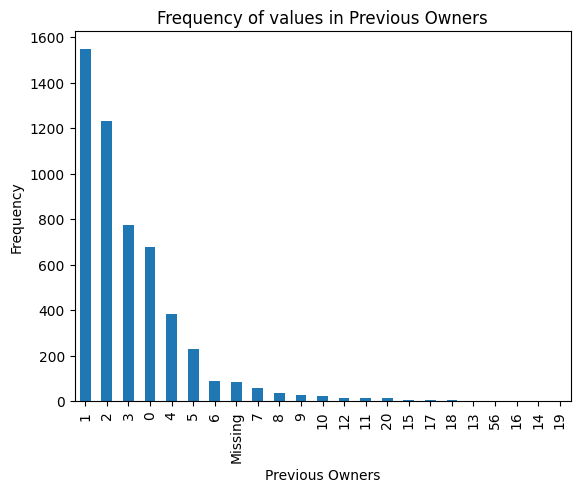

In [40]:
column_name = 'Previous Owners'
df_copy[column_name].value_counts().plot(kind='bar')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Frequency of values in {column_name}')
plt.show()

In [41]:
columns_to_drop = [col for col in df_copy.columns if 'Missing' in col]
df_copy = df_copy.drop(columns=columns_to_drop)[df_copy['Previous Owners'] != 'Missing']

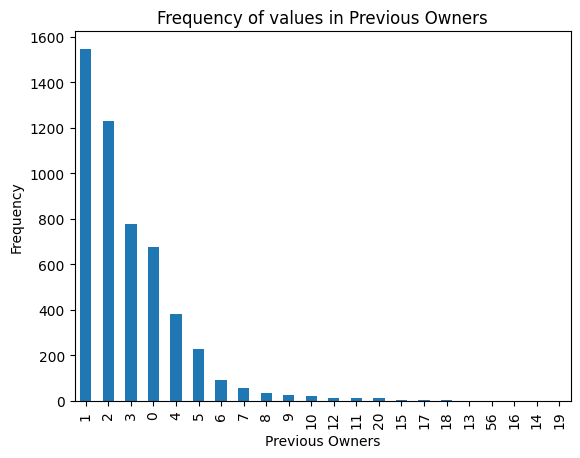

In [42]:
column_name = 'Previous Owners'
df_copy[column_name].value_counts().plot(kind='bar')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Frequency of values in {column_name}')
plt.show()

* Since frequency of values in Previous Owners it's Right-Skewed distribution I should to use median way to filling miss data.
* median = 2.0

In [43]:
df_copy['Previous Owners'] = pd.to_numeric(df_copy['Previous Owners'], errors='coerce')

median_value = df_copy['Previous Owners'].median()

df_copy['Previous Owners'] = df_copy['Previous Owners'].fillna(median_value)

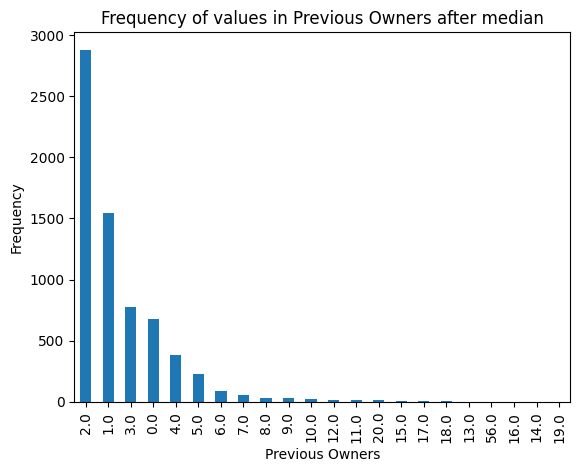

In [44]:
column_name = 'Previous Owners'
df_copy[column_name].value_counts().plot(kind='bar')

plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Frequency of values in {column_name} after median')
plt.show()

In [45]:
df_copy['Previous Owners'].value_counts()

Previous Owners
2.0     2879
1.0     1547
3.0      776
0.0      678
4.0      382
5.0      230
6.0       90
7.0       58
8.0       34
9.0       28
10.0      21
12.0      15
11.0      14
20.0      13
15.0       4
17.0       3
18.0       3
13.0       2
56.0       1
16.0       1
14.0       1
19.0       1
Name: count, dtype: int64

In [46]:
df_copy['Passenger Count'] = df_copy['Passenger Count'].astype(int)
df_copy['Previous Owners'] = df_copy['Previous Owners'].astype(int)

# Handle Engine Power

In [47]:
df_copy['Engine Power'].describe()

count    6781.000000
mean     1739.841616
std       583.488226
min       106.000000
25%      1400.000000
50%      1600.000000
75%      2000.000000
max      9000.000000
Name: Engine Power, dtype: float64

* Based on Data of Engine Power between 9000 to 3000 there is one data it's not reailty
* Also 460 - 400 not reaility

In [48]:
print(df_copy.shape[0])
features = ['Engine Power', 'Name']
x = df_copy[(df_copy['Engine Power'] <= 106) & (df_copy['Engine Power'] >= 400)]
x = x.sort_values(by='Engine Power')

6781


In [49]:
df_copy.drop(df_copy[df_copy['Engine Power'] == 9000].index, inplace=True)
df_copy.drop(df_copy[(df_copy['Engine Power'] >= 400) & (df_copy['Engine Power'] <= 460)].index, inplace=True)

df_copy.shape[0]

6768

In [50]:
# df_price = remove_outliers_iqr(df_copy, 'Price')

df_copy.describe()

,Model,Price,Engine Power,Car Mileage,Passenger Count,Previous Owners,Sunroof
count,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000
mean,2008.624557,66651.666962,1741.079492,124290.529133,5.230053,2.195331,0.263446
std,8.671389,56551.839535,574.725508,95201.536975,0.918008,2.032242,0.440535
min,1967.000000,1111.000000,106.000000,1000.000000,1.000000,0.000000,0.000000
25%,2005.000000,36000.000000,1400.000000,80000.000000,5.000000,1.000000,0.000000
50%,2011.000000,55000.000000,1600.000000,124150.722093,5.000000,2.000000,0.000000
75%,2015.000000,82000.000000,2000.000000,124150.722093,5.000000,2.000000,1.000000
max,2022.000000,999999.000000,7777.000000,999999.000000,22.000000,56.000000,1.000000


In [51]:
df_copy.describe()

,Model,Price,Engine Power,Car Mileage,Passenger Count,Previous Owners,Sunroof
count,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000
mean,2008.624557,66651.666962,1741.079492,124290.529133,5.230053,2.195331,0.263446
std,8.671389,56551.839535,574.725508,95201.536975,0.918008,2.032242,0.440535
min,1967.000000,1111.000000,106.000000,1000.000000,1.000000,0.000000,0.000000
25%,2005.000000,36000.000000,1400.000000,80000.000000,5.000000,1.000000,0.000000
50%,2011.000000,55000.000000,1600.000000,124150.722093,5.000000,2.000000,0.000000
75%,2015.000000,82000.000000,2000.000000,124150.722093,5.000000,2.000000,1.000000
max,2022.000000,999999.000000,7777.000000,999999.000000,22.000000,56.000000,1.000000


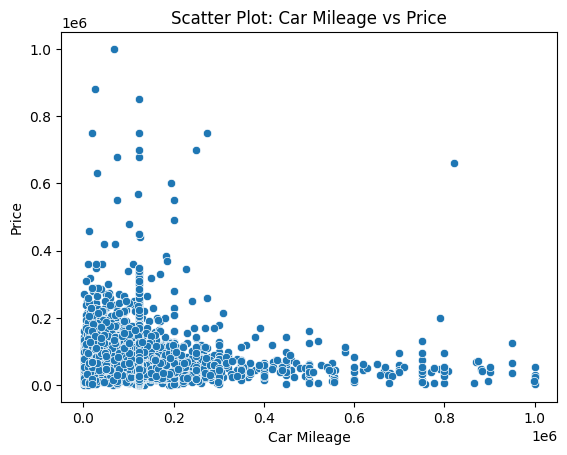

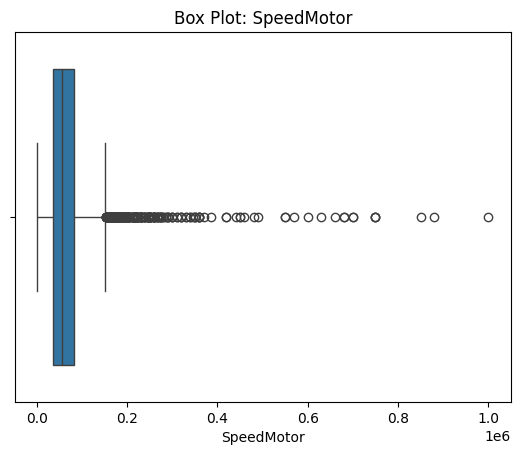

In [52]:
# رسم scatter plot لرؤية العلاقة بين متغيرين
sns.scatterplot(x='Car Mileage', y='Price', data=df_copy)
plt.title('Scatter Plot: Car Mileage vs Price')
plt.show()

# رسم Box plot لفحص التوزيع والقيم المتطرفة
sns.boxplot(x='Price', data=df_copy)
plt.title('Box Plot: SpeedMotor')
plt.xlabel('SpeedMotor')
plt.show()

# Feature Engineering

In [53]:
# Feature engineering:

# Name, Fuel type, origin, license, gear, glass, Payment => One hot 

def create_dummy_variables(df, column_name):
    """
    Create dummy variables for a categorical column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, the name of the categorical column for which dummy variables will be created

    Returns:
    - df: pandas DataFrame, the original DataFrame with dummy variables added
    """
    dummies = pd.get_dummies(df[column_name], prefix='', prefix_sep='')

    dummies = dummies.astype(int)

    df = pd.concat([df, dummies], axis=1)

    return df

def create_dummy_variables_for_columns(df, columns):
    """
    Create dummy variables for multiple categorical columns in a DataFrame (not binary features).

    Parameters:
    - df: pandas DataFrame
    - columns: list of str, the names of the categorical columns for which dummy variables will be created

    Returns:
    - df: pandas DataFrame, the original DataFrame with dummy variables added
    """
    for column_name in columns:
        df = create_dummy_variables(df, column_name)

    return df

categorical_features = ['Fuel Type', 'Vehicle Origin', 'Transmission Type']
df_copy = create_dummy_variables_for_columns(df_copy, categorical_features)

* Binary features

In [54]:
df_copy['Car License'] = df_copy['Car License'].apply(lambda x: 1 if x == 'فلسطينية' else 0)
df_copy['Glass'] = df_copy['Glass'].apply(lambda x: 1 if x == 'الكتروني' else 0)
df_copy['Payment Method'] = df_copy['Payment Method'].apply(lambda x: 1 if x == 'نقدا فقط' else 0)

In [55]:
column_name_mapping = {
    'بنزين': 'Petrol',
    'ديزل': 'Diesel',
    'كهرباء': 'Electric',
    'هايبرد': 'Hybrid',
    'تأجير': 'Rental',
    'تجاري': 'Commercial',
    'تدريب سياقة': 'Driving Training',
    'حكومي': 'Government',
    'خصوصي': 'Private',
    'عمومي': 'Public',
    'اوتوماتيك': 'Automatic',
    'عادي': 'Manual',
    'نصف اوتوماتيك': 'Semi-Automatic'
}

df_copy = df_copy.rename(columns=column_name_mapping)

df_copy.head(1)

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,...,Hybrid,Rental,Commercial,Driving Training,Government,Private,Public,Automatic,Manual,Semi-Automatic
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,1,اوتوماتيك,1,2000,...,0,0,0,0,0,1,0,1,0,0


In [56]:
features_dropped_after_encoding = ['Car Color','Fuel Type','Vehicle Origin','Transmission Type']

df_copy = df_copy.drop(features_dropped_after_encoding, axis=1)

In [57]:
df_copy = create_dummy_variables(df_copy, 'Name')

In [58]:
df_copy.describe()

,Model,Price,Car License,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Previous Owners,Sunroof,...,هونداي سنتافيه,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠٠٦,هونداي ٢٠١٥
count,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,...,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000,6768.000000
mean,2008.624557,66651.666962,0.989657,0.923463,1741.079492,124290.529133,5.230053,0.631649,2.195331,0.263446,...,0.000148,0.002069,0.007535,0.000296,0.000739,0.003251,0.000296,0.003989,0.000148,0.000148
std,8.671389,56551.839535,0.101180,0.265874,574.725508,95201.536975,0.918008,0.482393,2.032242,0.440535,...,0.012155,0.045438,0.086486,0.017189,0.027172,0.056925,0.017189,0.063040,0.012155,0.012155
min,1967.000000,1111.000000,0.000000,0.000000,106.000000,1000.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,36000.000000,1.000000,1.000000,1400.000000,80000.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,55000.000000,1.000000,1.000000,1600.000000,124150.722093,5.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,82000.000000,1.000000,1.000000,2000.000000,124150.722093,5.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,999999.000000,1.000000,1.000000,7777.000000,999999.000000,22.000000,1.000000,56.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* `Normalized features`

In [63]:
price_scaler = MinMaxScaler()

df_copy['Price'] = price_scaler.fit_transform(df_copy[['Price']])
with open('../Pickles/price_pickle.pkl', 'wb') as file:
    pickle.dump(price_scaler, file)
    
power_scaler = MinMaxScaler()
df_copy['Engine Power'] = power_scaler.fit_transform(df_copy[['Engine Power']])
with open('../Pickles/power_scaler.pkl', 'wb') as file:
    pickle.dump(power_scaler, file)
    
speedmoter = MinMaxScaler()
df_copy['Car Mileage'] = speedmoter.fit_transform(df_copy[['Car Mileage']])
with open('../Pickles/speedmoter_scaler.pkl', 'wb') as file:
    pickle.dump(speedmoter, file)

In [64]:
df_copy.describe()

df_copy

,Name,Model,Price,Car License,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Previous Owners,...,هونداي سنتافيه,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠٠٦,هونداي ٢٠١٥
0,كيا اوبتيما,2014,0.098999,1,1,0.246904,0.074074,5,1,1,...,0,0,0,0,0,0,0,0,0,0
3,كيا سورينتو,2007,0.058955,1,1,0.312084,0.129129,8,0,2,...,0,0,0,0,0,0,0,0,0,0
4,هونداي افانتي,2006,0.042436,1,1,0.194759,0.123274,5,1,2,...,0,0,0,0,0,0,0,0,0,0
6,فيات 127,1982,0.004394,1,0,0.104289,0.123274,5,0,0,...,0,0,0,0,0,0,0,0,0,0
7,بيجو 208,2014,0.052948,1,1,0.142615,0.037037,5,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,كيا مورننغ,2015,0.043938,1,1,0.116543,0.129129,5,0,2,...,0,0,0,0,0,0,0,0,0,0
7772,فورد ترانزيت,2002,0.046941,1,1,0.299048,0.123274,8,1,5,...,0,0,0,0,0,0,0,0,0,0
7773,بيجو بارتنر,2018,0.085985,1,1,0.194759,0.049049,5,1,0,...,0,0,0,0,0,0,0,0,0,0
7774,كيا سورينتو,2017,0.125028,1,1,0.272976,0.099099,7,1,2,...,0,0,0,0,0,0,0,0,0,0


# Export Cleaned Data

In [61]:
df_copy.to_csv('cleaned_car_data2.csv', index=False)